# Gestión Moderna de portafolio
### Autores Bernardo León y Carlos Zapata
### Copyright 2022

## Capitulo 3: Modelo CAPM

### Ejemplos 3.1 y 3.2. Estimación de parámetros: $\alpha_i$ y $\beta_i$

In [2]:
#Librerías 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
%pip install yfinance
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 20.0 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [6]:
## Estimaciones para AAPL
# Información histórica para AAPL 
fechai = "2015-12-01"
fechaf = "2020-12-31"
periodicidad = "1Mo"
aapl = ["AAPL"]
p_aapl = yf.download(aapl,start=fechai,end=fechaf,interval=periodicidad)['Adj Close'].dropna()
r_aapl = np.log(p_aapl/p_aapl.shift(1)).dropna()
aapl = ["AAPL"]
indice = yf.download("^GSPC",start=fechai,end=fechaf,interval=periodicidad)['Adj Close'].dropna()
r_indice = np.log(indice/indice.shift(1)).dropna()
rm = r_indice.mean()
sigmam = r_indice.std()
round(rm,4), round(sigmam,4)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


(0.0101, 0.0441)

In [131]:
# Estimación lineal
slope, intercept, r, p, std_err = stats.linregress(r_indice, r_aapl)
def linestim(x):
  return intercept + slope * x

model = list(map(linestim, r_indice))

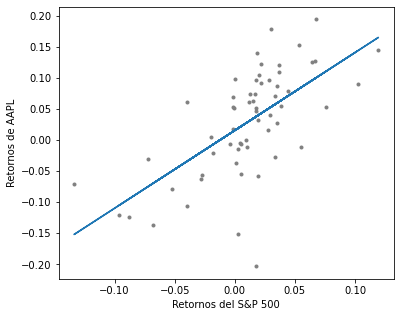

In [132]:
# Gráfico de dispersión
fig = plt.figure(figsize = (6, 5))
ax = fig.add_subplot(111)
plt.plot(r_indice, r_aapl, ".", color = 'gray')
plt.plot(r_indice, model)
plt.xlabel("Retornos del S&P 500")
plt.ylabel("Retornos de AAPL")
plt.show()

In [133]:
# Estimacion betas
beta = round(slope,4)
alpha = round(intercept,4)
print('Beta AAPL: ', beta )
print('Alpha AAPL: ', alpha)

Beta AAPL:  1.2533
Alpha AAPL:  0.0155


In [136]:
## Estimaciones para AAPL, AMZN, GOOG y MSFT
# Información histórica 
fechai = "2015-12-01"
fechaf = "2020-12-31"
periodicidad = "1Mo"
activos = ["AAPL","AMZN","GOOGL","MSFT"]
precios = yf.download(activos,start=fechai,end=fechaf,interval=periodicidad)['Adj Close'].dropna()
retornos = np.log(precios/precios.shift(1)).dropna()
indice = yf.download("^GSPC",start=fechai,end=fechaf,interval=periodicidad)['Adj Close'].dropna()
r_indice = np.log(indice/indice.shift(1)).dropna()

[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  1 of 1 completed


In [144]:
# Estimaciones AAPL
slope, intercept, r, p, se = stats.linregress(r_indice, retornos['AAPL'])
def linestim(x):
  return intercept + slope * x

beta_aapl = slope
alpha_aapl = intercept
print("Beta: ", round(beta_aapl,4))
print("Alpha: ", round(alpha_aapl,4))
print(f"R-squared: {r**2:.6f}")

Beta:  1.2533
Alpha:  0.0155
R-squared: 0.415940


In [146]:
# Estimación varianza del error
t=60
model = list(map(linestim, r_indice))
error = (((retornos['AAPL']-model)**2).sum())/(t-1)
round(error,4)

0.0043

In [147]:
# Estimaciones AMZN
slope, intercept, r, p, se = stats.linregress(r_indice, retornos['AMZN'])
def linestim(x):
  return intercept + slope * x

beta_amzn = slope
alpha_amzn = intercept
print("Beta: ", round(beta_amzn,4))
print("Alpha: ", round(alpha_amzn,4))
print(f"R-squared: {r**2:.6f}")

Beta:  1.162
Alpha:  0.0144
R-squared: 0.403685


In [149]:
# Estimación varianza del error
t=60
model = list(map(linestim, r_indice))
error = (((retornos['AMZN']-model)**2).sum())/(t-1)
round(error,4)

0.0039

In [150]:
# Estimaciones GOOG
slope, intercept, r, p, se = stats.linregress(r_indice, retornos['GOOGL'])
def linestim(x):
  return intercept + slope * x

beta_goog = slope
alpha_goog = intercept

print("Beta: ", round(beta_goog,4))
print("Alpha: ", round(alpha_goog,4))
print(f"R-squared: {r**2:.6f}")

Beta:  0.9939
Alpha:  0.0035
R-squared: 0.506412


In [151]:
# Estimación varianza del error
t=60
model = list(map(linestim, r_indice))
error = (((retornos['GOOGL']-model)**2).sum())/(t-1)
round(error,4)

0.0019

In [152]:
# Estimaciones MSFT
slope, intercept, r, p, se = stats.linregress(r_indice, retornos['MSFT'])
def linestim(x):
  return intercept + slope * x

beta_msft = slope
alpha_msft = intercept
print("Beta: ", round(beta_msft,4))
print("Alpha: ", round(alpha_msft,4))
print(f"R-squared: {r**2:.6f}")

Beta:  0.8035
Alpha:  0.0165
R-squared: 0.469904


In [153]:
# Estimación varianza del error
t=60
model = list(map(linestim, r_indice))
error = (((retornos['MSFT']-model)**2).sum())/(t-1)
round(error,4)

0.0014

In [83]:
# Estimación de retornos esperados 
rf = 0.02/12
re_aapl = rf + beta_aapl*(rm-rf)
re_amzn = rf + beta_amzn*(rm-rf)
re_goog = rf + beta_goog*(rm-rf)
re_msft = rf + beta_msft*(rm-rf)

print("E(R)_aapl: ", round(re_aapl,4))
print("E(R)_amzn: ", round(re_amzn,4))
print("E(R)_goog: ", round(re_goog,4))
print("E(R)_msft: ", round(re_msft,4))

E(R)_aapl:  0.0123
E(R)_amzn:  0.0115
E(R)_goog:  0.0101
E(R)_msft:  0.0085


## Ejemplo 3.3
## Modelo de Sharpe para portafolio óptimo

In [ ]:
## Pendiente desarrollar

## Ejemplos 3.4 y 3.5
## Clasificación y optimización ussando el modelo de Treynor

In [4]:
## Información histórica 
fechai = "2015-12-01"
fechaf = "2020-12-31"
periodicidad = "1Mo"
activos = ["AAPL","ABT","AMZN","CAT","CSX","FB","GOOG","HD","JNJ","MSFT","MCD","V"]
precios = yf.download(activos,start=fechai,end=fechaf,interval=periodicidad)['Adj Close'].dropna()
retornos = np.log(precios/precios.shift(1)).dropna()
indice = yf.download("^GSPC",start=fechai,end=fechaf,interval=periodicidad)['Adj Close'].dropna()
r_indice = np.log(indice/indice.shift(1)).dropna()
rm = r_indice.mean()*12
sigmam = (r_indice.std())*np.sqrt(12)
round(rm,4), round(sigmam,4)

[*********************100%***********************]  12 of 12 completed
[*********************100%***********************]  1 of 1 completed


(0.1217, 0.1529)

In [5]:
# Retornos esperados y volatilidades de los activos
mu = retornos.mean()*12
cov = retornos.cov()*12
var = np.diag(cov)
sigma = (retornos.std())*np.sqrt(12)
estimaciones = pd.concat([mu, sigma],1).T
estimaciones.index=["Retorno","Riesgo"]
estimaciones 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  


,AAPL,ABT,AMZN,CAT,CSX,FB,GOOG,HD,JNJ,MCD,MSFT,V
Retorno,0.338850,0.197844,0.314502,0.227029,0.266688,0.191868,0.167320,0.162546,0.112312,0.145223,0.296015,0.214144
Riesgo,0.297155,0.200081,0.279652,0.256861,0.266807,0.269973,0.210995,0.207042,0.167893,0.169892,0.179247,0.185021


In [6]:
# Estimaciones: betas y varerror
n = len(mu)
t = 60
def linestim(x):
  return intercept + slope * x

betas = np.zeros((n,1))
varerror = np.zeros((n,1))

for i in range(n):
  slope, intercept, r, p, se = stats.linregress(r_indice, retornos.iloc[:,i])
  model = list(map(linestim, r_indice))
  betas[i] = slope
  varerror[i] = ((((retornos.iloc[:,i]-model)**2).sum())/(t-1))*12


In [7]:
# Resultados estimaciones: betas y var error
betas.T, varerror.T

(array([[1.25328243, 0.80660781, 1.16195437, 0.98736772, 1.18668188,
         1.13400304, 0.98344121, 1.02720579, 0.67969719, 0.58816305,
         0.80353982, 0.94550202]]),
 array([[0.0515733 , 0.02481899, 0.0466349 , 0.04318142, 0.03825752,
         0.04281597, 0.02190394, 0.01819369, 0.01738544, 0.02077431,
         0.01703169, 0.01332904]]))

In [8]:
# Cálculo coeficiente de Treynor
rf = 0
mu = np.array(mu).reshape((n,1))
betas = np.array(betas).reshape((n,1))
treynor = (mu-rf)/betas
treynor.T

array([[0.27036979, 0.245279  , 0.27066639, 0.22993312, 0.22473391,
        0.16919543, 0.1701375 , 0.15824047, 0.16523902, 0.24690861,
        0.36838926, 0.22648684]])

In [9]:
estimaciones = np.matrix(np.concatenate([np.array(treynor).reshape((n,1)),np.array(mu).reshape((n,1)), 
                                      np.array(sigma).reshape((n,1)), np.array(betas).reshape((n,1)),
                                      np.array(varerror).reshape((n,1))],1))

tabla = pd.DataFrame(estimaciones)
tabla.columns=['Treynor','Retorno','Riesgo','Beta','VarError']
tabla.index=activos 
tabla

,Treynor,Retorno,Riesgo,Beta,VarError
AAPL,0.270370,0.338850,0.297155,1.253282,0.051573
ABT,0.245279,0.197844,0.200081,0.806608,0.024819
AMZN,0.270666,0.314502,0.279652,1.161954,0.046635
CAT,0.229933,0.227029,0.256861,0.987368,0.043181
CSX,0.224734,0.266688,0.266807,1.186682,0.038258
FB,0.169195,0.191868,0.269973,1.134003,0.042816
GOOG,0.170137,0.167320,0.210995,0.983441,0.021904
HD,0.158240,0.162546,0.207042,1.027206,0.018194
JNJ,0.165239,0.112312,0.167893,0.679697,0.017385
MSFT,0.246909,0.145223,0.169892,0.588163,0.020774


In [10]:
# Se ordenan los activos usando el coef. de Treynor
tabla_sort = tabla.sort_values(by=['Treynor'],ascending=False)
tabla_sort

,Treynor,Retorno,Riesgo,Beta,VarError
MCD,0.368389,0.296015,0.179247,0.803540,0.017032
AMZN,0.270666,0.314502,0.279652,1.161954,0.046635
AAPL,0.270370,0.338850,0.297155,1.253282,0.051573
MSFT,0.246909,0.145223,0.169892,0.588163,0.020774
ABT,0.245279,0.197844,0.200081,0.806608,0.024819
CAT,0.229933,0.227029,0.256861,0.987368,0.043181
V,0.226487,0.214144,0.185021,0.945502,0.013329
CSX,0.224734,0.266688,0.266807,1.186682,0.038258
GOOG,0.170137,0.167320,0.210995,0.983441,0.021904
FB,0.169195,0.191868,0.269973,1.134003,0.042816


In [13]:
# Se calcula la tasa de corte y se estiman los pesos óptimos
ratio1 = ((tabla_sort['Retorno']-rf)*tabla_sort['Beta'])/tabla_sort['VarError']
ratio2 = tabla_sort['Beta']**2/tabla_sort['VarError']

sumacu1 = ratio1.cumsum()
sumacu2 = ratio2.cumsum()
tasac = (sigmam**2 * sumacu1)/(1+ sigmam**2 * sumacu2)
cuttoff = tasac.max()

AttributeError: ignored

In [31]:
Zi = (tabla_sort['Beta']/tabla_sort['VarError'])*(tabla_sort['Treynor']-cuttoff)
Zi = Zi.mask(Zi<0, 0)
wi = round(Zi/sum(Zi),4)
wpot = round(wi,4)
wpot
#rpot = wpot @ mu
#sigmapot = np.sqrt(wpot.T @ cov @ wpot)
#rpot,  sigmapot

MCD     0.6292
AMZN    0.1078
AAPL    0.1044
MSFT    0.0604
ABT     0.0645
CAT     0.0130
V       0.0179
CSX     0.0028
GOOG    0.0000
FB      0.0000
JNJ     0.0000
HD      0.0000
dtype: float64

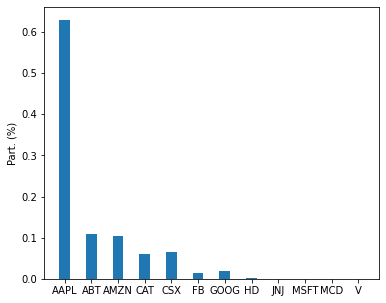

In [32]:
# Pesos del Portafolio de Treynor
fig = plt.figure(figsize = (6, 5))
plt.bar(activos, wpot, width = 0.4)
plt.ylabel("Part. (%)")
plt.show()